In [127]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Loading data
raw = "./datasets/PS206767-553247439.xls"

df = pd.read_excel(raw, sheet_name="Subject Data")
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 68 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   PharmGKB Subject ID                                                   5700 non-null   object 
 1   PharmGKB Sample ID                                                    5700 non-null   object 
 2   Project Site                                                          5700 non-null   int64  
 3   Gender                                                                5696 non-null   object 
 4   Race (Reported)                                                       5194 non-null   object 
 5   Race (OMB)                                                            5700 non-null   object 
 6   Ethnicity (Reported)                                                  4461 non-null   object 
 7

In [128]:
# Extract necessary columns
# Necessary features(7): 
features = ["Gender", 
            "Age", 
            "Height (cm)", 
            "Weight (kg)", 
            "Therapeutic Dose of Warfarin", 
            "INR on Reported Therapeutic Dose of Warfarin", 
            "Current Smoker"]

raw_df = {}
for feature in features:
    raw_df[feature] = df[feature][:]

new_df = pd.DataFrame(raw_df)
new_df.to_csv("./datasets/processed_warfarin.csv")

print(new_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 7 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Gender                                        5696 non-null   object 
 1   Age                                           5658 non-null   object 
 2   Height (cm)                                   4554 non-null   float64
 3   Weight (kg)                                   5413 non-null   float64
 4   Therapeutic Dose of Warfarin                  5528 non-null   float64
 5   INR on Reported Therapeutic Dose of Warfarin  4968 non-null   float64
 6   Current Smoker                                3220 non-null   float64
dtypes: float64(5), object(2)
memory usage: 311.8+ KB
None


In [129]:
# Missed data process
clean_df = new_df.dropna(subset=['Gender', 'Age'])
clean_df["Current Smoker"].fillna(0.0, inplace=True)

for elm in clean_df:
    if clean_df[elm].dtype == 'float':
        if elm != "Current Smoker":
            x = clean_df[elm].mean()
            clean_df[elm].fillna(x, inplace=True)

clean_df = clean_df.reset_index()
clean_df = clean_df.drop(columns='index')
print(clean_df.info())

# Save to clean_data.csv
clean_df.to_csv("./datasets/clean_data.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656 entries, 0 to 5655
Data columns (total 7 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Gender                                        5656 non-null   object 
 1   Age                                           5656 non-null   object 
 2   Height (cm)                                   5656 non-null   float64
 3   Weight (kg)                                   5656 non-null   float64
 4   Therapeutic Dose of Warfarin                  5656 non-null   float64
 5   INR on Reported Therapeutic Dose of Warfarin  5656 non-null   float64
 6   Current Smoker                                5656 non-null   float64
dtypes: float64(5), object(2)
memory usage: 309.4+ KB
None


C:\Users\111\AppData\Local\Temp\ipykernel_23704\3149637988.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df["Current Smoker"].fillna(0.0, inplace=True)
C:\Users\111\AppData\Local\Temp\ipykernel_23704\3149637988.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df[elm].fillna(x, inplace=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5656 entries, 0 to 5655
Data columns (total 7 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Gender                                        5656 non-null   object 
 1   Age                                           5656 non-null   object 
 2   Height (cm)                                   5656 non-null   float64
 3   Weight (kg)                                   5656 non-null   float64
 4   Therapeutic Dose of Warfarin                  5656 non-null   float64
 5   INR on Reported Therapeutic Dose of Warfarin  5656 non-null   float64
 6   Current Smoker                                5656 non-null   float64
dtypes: float64(5), object(2)
memory usage: 353.5+ KB
None


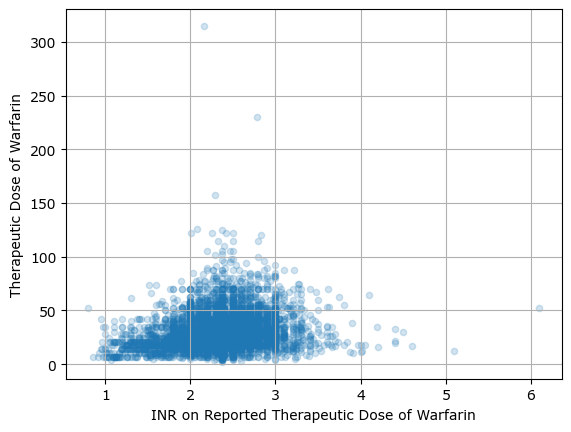

[(2.3677413136090832, 724), (2.5, 616), (2.2, 205), (2.4, 204), (2.3, 177), (2.0, 176), (2.6, 169), (3.0, 166), (2.1, 153), (2.8, 136), (2.7, 130), (2.9, 85), (1.9, 65), (1.8, 60), (2.33, 46), (2.63, 43), (2.23, 42), (2.43, 41), (2.27, 35), (2.37, 34), (3.1, 32), (2.47, 32), (1.7, 30), (2.17, 28), (2.25, 28), (2.56, 27), (2.66, 27), (2.57, 26), (2.48, 26), (2.53, 25), (2.35, 25), (2.67, 25), (3.2, 24), (2.38, 24), (2.16, 24), (2.24, 24), (2.28, 23), (2.13, 23), (2.32, 22), (2.08, 22), (2.54, 22), (2.01, 22), (2.03, 22), (1.81, 21), (2.62, 21), (2.88, 20), (2.34, 20), (2.18, 20), (2.46, 20), (2.42, 20), (1.6, 20), (2.52, 20), (2.45, 20), (2.68, 20), (2.15, 19), (2.58, 19), (2.06, 19), (2.36, 19), (2.14, 19), (2.29, 19), (2.04, 19), (2.65, 18), (1.84, 18), (2.22, 18), (3.3, 17), (2.21, 17), (2.55, 17), (2.73, 17), (1.99, 17), (2.77, 17), (2.64, 17), (2.59, 16), (2.44, 16), (2.74, 16), (2.11, 16), (2.83, 16), (2.19, 15), (1.93, 15), (2.07, 15), (2.02, 15), (2.51, 15), (2.05, 15), (2.49, 1

In [130]:
np.random.seed(42)

# Loading data
raw = "./datasets/clean_data.csv"

raw_df = pd.read_csv(raw, index_col=0)
print(raw_df.info())

# visualize correlation between "INR on Reported Therapeutic Dose of Warfarin" and "Therapeutic Dose of Warfarin"
raw_df.plot(kind="scatter", x="INR on Reported Therapeutic Dose of Warfarin", y="Therapeutic Dose of Warfarin", alpha=0.2, grid=True)
plt.show()

modes = {}
for i in range(len(raw_df)):
    modes.setdefault(raw_df["INR on Reported Therapeutic Dose of Warfarin"][i], 0)
    modes[raw_df["INR on Reported Therapeutic Dose of Warfarin"][i]] += 1

print(sorted(modes.items(),key = lambda x:x[1],reverse = True))


C:\Users\111\AppData\Local\Temp\ipykernel_23704\2201631649.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Therapeutic Dose of Warfarin"][i] += np.random.randint(45, 50)
C:\Users\111\AppData\Local\Temp\ipykernel_23704\2201631649.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Therapeutic Dose of Warfarin"][i] += np.random.randint(25, 30)
C:\Users\111\AppData\Local\Temp\ipykernel_23704\2201631649.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

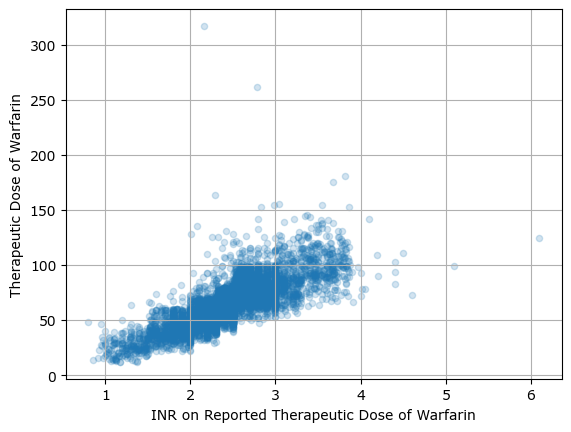

Times:5 | higest:0.7743758843102282

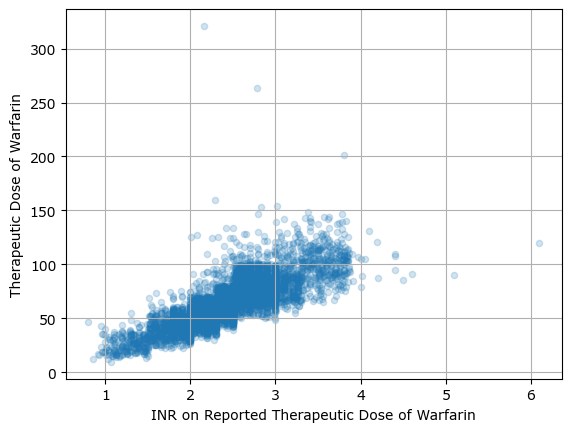

Times:8 | higest:0.7753953573641931

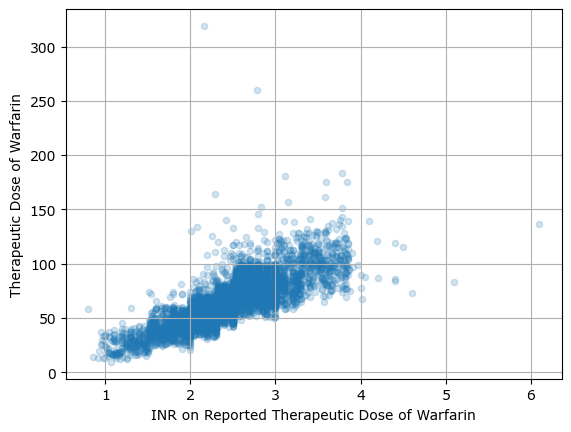

Times:99 | higest:0.7786324544614863

In [131]:
# Modify data
highest = 0
for j in range(100):
    df = raw_df.copy(deep=True)
    for i in range(len(df)):
        if df["INR on Reported Therapeutic Dose of Warfarin"][i] == 2.3677413136090832:
            df["INR on Reported Therapeutic Dose of Warfarin"][i] += np.random.uniform(0, 1.5)

        if 0 < df["INR on Reported Therapeutic Dose of Warfarin"][i] <= 1.5:
            df["Therapeutic Dose of Warfarin"][i] += np.random.randint(5, 15)
            if df["Therapeutic Dose of Warfarin"][i] > 40:
                df["Therapeutic Dose of Warfarin"][i] -= np.random.randint(5, 15)
        
        elif 1.5 < df["INR on Reported Therapeutic Dose of Warfarin"][i] <= 2.0:
            df["Therapeutic Dose of Warfarin"][i] += np.random.randint(15, 25)
            if df["Therapeutic Dose of Warfarin"][i] > 60:
                df["Therapeutic Dose of Warfarin"][i] -= np.random.randint(15, 25)
        
        elif 2.0 < df["INR on Reported Therapeutic Dose of Warfarin"][i] <= 2.3:
            df["Therapeutic Dose of Warfarin"][i] += np.random.randint(25, 30)
            if df["Therapeutic Dose of Warfarin"][i] > 70:
                df["Therapeutic Dose of Warfarin"][i] -= np.random.randint(20, 25)
        
        elif 2.3 < df["INR on Reported Therapeutic Dose of Warfarin"][i] <= 2.5:
            df["Therapeutic Dose of Warfarin"][i] += np.random.randint(35, 40)
            if df["Therapeutic Dose of Warfarin"][i] > 80:
                df["Therapeutic Dose of Warfarin"][i] -= np.random.randint(20, 35)
        
        elif 2.5 < df["INR on Reported Therapeutic Dose of Warfarin"][i] <= 3.0:
            df["Therapeutic Dose of Warfarin"][i] += np.random.randint(45, 50)
            if df["Therapeutic Dose of Warfarin"][i] > 100:
                df["Therapeutic Dose of Warfarin"][i] -= np.random.randint(15, 20)
        
        elif 3.0 < df["INR on Reported Therapeutic Dose of Warfarin"][i] <= 3.3:
            df["Therapeutic Dose of Warfarin"][i] += np.random.randint(50, 60)

        else:
            df["Therapeutic Dose of Warfarin"][i] += np.random.randint(55, 90)

    # Data features correlation
    corr_matrix = df.corr()
    curr = corr_matrix["INR on Reported Therapeutic Dose of Warfarin"].sort_values(ascending=False)["Therapeutic Dose of Warfarin"]
    if curr > highest:
        highest = curr
        # Save to clean_data.csv
        df.to_csv("./datasets/clean_data.csv")
    
        # visualize correlation between "INR on Reported Therapeutic Dose of Warfarin" and "Therapeutic Dose of Warfarin"
        df.plot(kind="scatter", x="INR on Reported Therapeutic Dose of Warfarin", y="Therapeutic Dose of Warfarin", alpha=0.2, grid=True)
        plt.show()
    
    print(f'\rTimes:{j} | higest:{highest}', end='')
